<h1><b>Bengaluru House Price Prediction


<h2> Title: Bengaluru House Price Prediction Using Linear Regression

<h3> Introduction:


*   Real estate prices depend on multiple factors: area, number of bedrooms, bathrooms, balconies, location, etc.
*   Objective: Predict house prices using Simple Linear Regression (SLR) and Multiple Linear Regression (MLR).


*   LCompare results on raw data vs cleaned data to understand the impact of preprocessing.





<h2> Libraries & Tools

*   Pandas & NumPy: For data manipulation and calculations.
*   Matplotlib & Seaborn: For data visualization.


*  Scikit-learn: For implementing regression models, splitting datasets, and evaluating performance.






In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

<h3> Now importing the data set

In [135]:
url = "https://raw.githubusercontent.com/bapujik/dataSets/refs/heads/main/Bengaluru_House_Data.csv"

df = pd.read_csv(url)

In [136]:
df.sample(7)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
10785,Built-up Area,Ready To Move,Horamavu Agara,2 BHK,SLoraFl,1080,2.0,1.0,38.0
3480,Built-up Area,Ready To Move,Sahyadri Layout,3 BHK,Adthm R,1750,3.0,1.0,180.0
5321,Built-up Area,18-Jan,Lal Bahadur Shastri Nagar,2 BHK,NaN,856,2.0,1.0,48.0
5038,Super built-up Area,Ready To Move,Vijayanagar,2 BHK,J isear,1200,2.0,2.0,62.0
6209,Super built-up Area,Ready To Move,Sahakara Nagar,3 BHK,HoAcela,1914,3.0,2.0,149.0
9331,Super built-up Area,Ready To Move,Devanahalli,3 BHK,NaN,1550,3.0,1.0,85.0
11983,Built-up Area,Ready To Move,Ashwathnagar,3 Bedroom,NaN,800,2.0,0.0,60.0


<h2> Dataset Overview

<h3>Dataset contains features like:



*   area_type	  → where the plots are located
*  availability	 → when the flats are/ gonne be ready to move


*   location → categorical variable
*   size → number of bedrooms
*   bathroom → number of bathrooms

*  bathroom → number of bathrooms
*   balcony → number of balconies




*   total_sqft → total area in sq. ft.

*   price → target variable


In [137]:
df.info()        #the datatype of each cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [138]:
df.isnull().sum()      #number of missing values in each columns

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [139]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


<h2>Data Visualization (Before Cleaning)

In this step, I will explore the dataset visually to understand the distribution of features, detect missing values, and identify possible outliers. Visualization helps in answering questions like:



*   What is the distribution of house prices?
*   How do numerical features like total_sqft, bath, and balcony vary across properties?


*   Do we see unusual or extreme values that might need cleaning later?
*   What is the composition of categorical features like area_type, availability, and location?

I will use histograms, boxplots, scatterplots, and countplots for both numerical and categorical features.






<h3> Distribution of Target Variable (price)

---



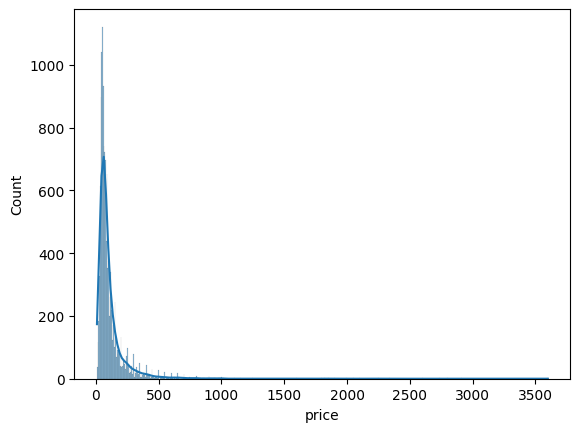

In [140]:
sns.histplot(df['price'], kde=True)
plt.show()

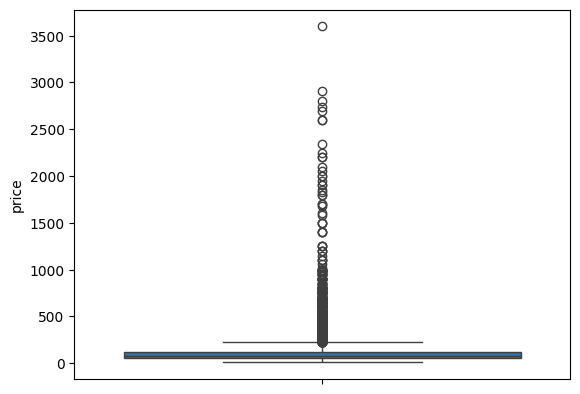

In [141]:
sns.boxplot(df['price'])
plt.show()

From the visualization of the price column (our target variable), we can observe that house prices are highly skewed and contain extreme outliers. This indicates that a small number of very expensive properties are present in the dataset, which might affect the performance of our regression models if not handled properly.

<h2>Numerical Features (total_sqft, bath, balcony)

While exploring the dataset, I initially assumed total_sqft was a purely numerical column. However, on closer inspection, it contains a mix of formats: Pure numbers, Ranges, Non-numeric text.

Because of this, total_sqft cannot be treated as a numerical feature in its raw form. We will handle these inconsistencies during the data preprocessing/cleaning stage by converting ranges into averages and mapping non-standard units into a consistent numerical format.

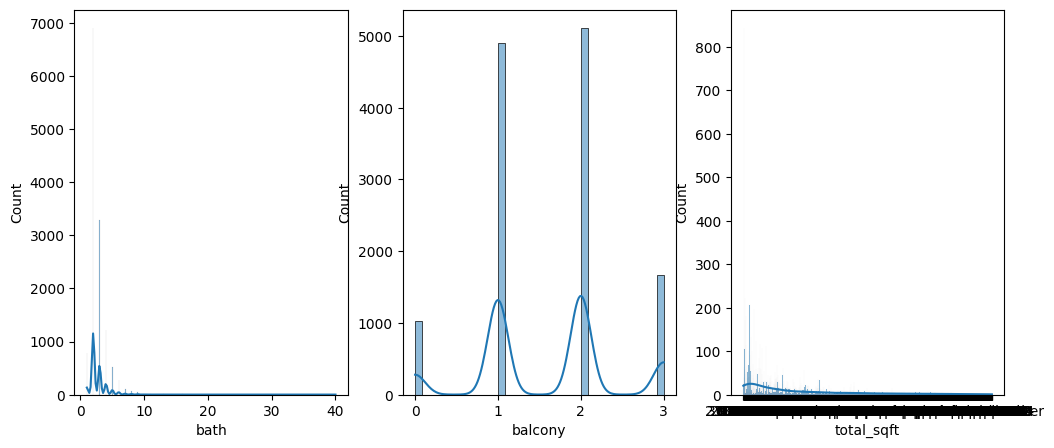

In [142]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sns.histplot(df['bath'], kde=True, ax=axes[0])
sns.histplot(df['balcony'], kde=True, ax=axes[1])
sns.histplot(df['total_sqft'], kde=True, ax=axes[2])
plt.show()

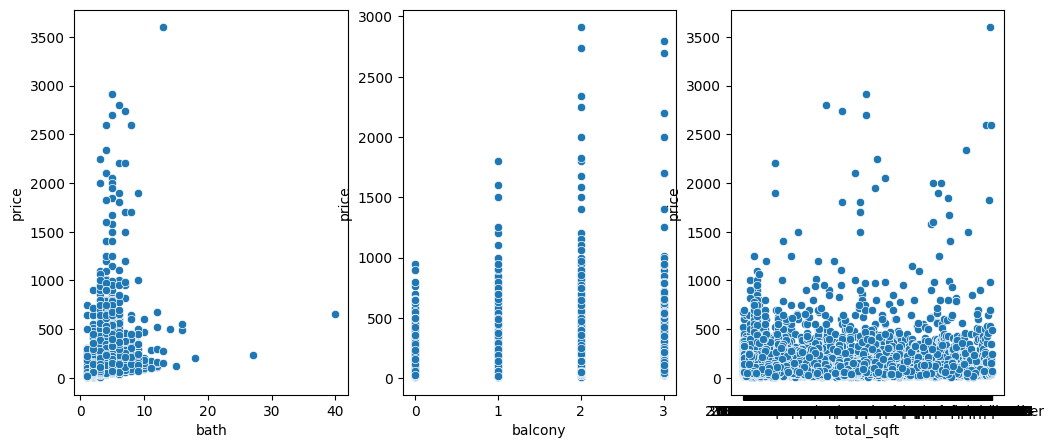

In [143]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sns.scatterplot(data=df, x='bath', y='price', ax=axes[0])
sns.scatterplot(data=df, x='balcony', y='price', ax=axes[1])
sns.scatterplot(data=df, x='total_sqft', y='price', ax=axes[2])
plt.show()

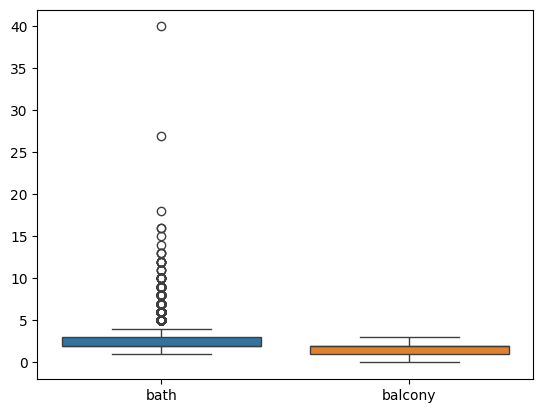

In [144]:
cols = ['bath', 'balcony']
sns.boxplot(data=df[cols])
plt.show()

All three numerical features (total_sqft, bath, balcony) show outliers when visualized.



*   bath: Boxplots reveal a large number of extreme outliers (e.g., houses with unusually high bathroom counts).
*   balcony: Shows fewer outliers, but it contains floating values which will need careful handling.

**Takeaway:** While these numerical features are important for prediction, they need cleaning and outlier treatment before being used in modeling.

<h2> Categorical Features (area_type, availability, location, size)

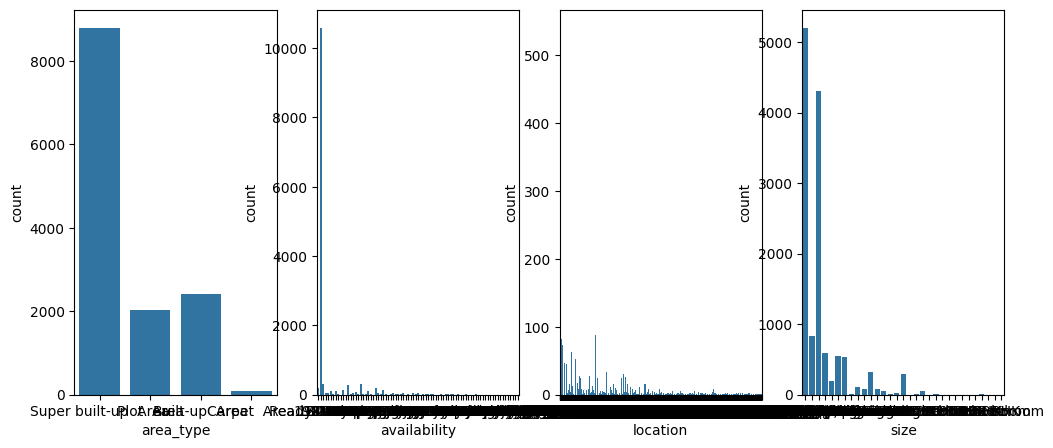

In [145]:
fig, axes = plt.subplots(1, 4, figsize=(12, 5))

sns.countplot(data = df, x="area_type", ax=axes[0])
sns.countplot(data=df, x='availability', ax=axes[1])
sns.countplot(data=df, x='location', ax=axes[2])
sns.countplot(data=df, x='size', ax=axes[3])
plt.show()

From the visualizations of categorical columns, we can see that some categories are heavily populated while others have very few entries.


*   area_type and size are dominated by a few categories.
*   location has a few popular locations with many properties, while most locations have very few listings.

**Implication:** This imbalance may bias the model toward the dominant categories. We will handle this during data preprocessing by grouping rare categories and encoding categorical variables appropriately.

<h2> Heatmap

A heatmap or correlation analysis is the standard method to identify which numeric feature is most strongly related to the target variable (price) and hence is suitable for Simple Linear Regression (SLR).
In the raw dataset, before any feature engineering, cleaning, or preprocessing, performing correlation analysis often gives poor or misleading values due to missing data, outliers, and inconsistent formats. This highlights the importance of preprocessing before building reliable regression models.

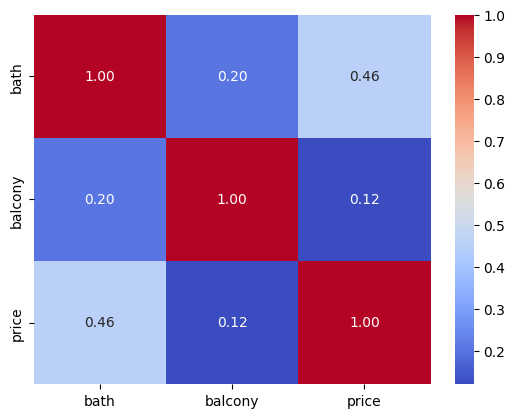

In [146]:
corr_matrix = df[['bath', 'balcony', 'price']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

<h2> SLR on Raw data

The correlation heatmap of the raw dataset was only 3×3 (including bath and balcony), which gives unreliable correlation values due to missing values, outliers, and inconsistent formats.

Therefore, for the Simple Linear Regression (SLR) on the raw data, I chose bath as the predictor (X) and price as the target (y), since bath is a clean numeric feature and can serve as a baseline for understanding the relationship with house price before data preprocessing.

To perform SLR and MLR without modifying the original dataset, I created a separate copy of the numeric columns and substituted missing values (NaN) with the mean of each column.
This allows us to build baseline regression models on “partially cleaned” data while keeping the original dataset unchanged for further preprocessing and proper cleaning later.

In [147]:
new_df = df.copy()
new_df['balcony'] = df['balcony'].fillna(df['balcony'].mean())
new_df['bath'] = df['bath'].fillna(df['bath'].mean())

In [148]:
X_slr = new_df[['bath']]
y = new_df['price']

X_slr_train, X_slr_test, y_train, y_test = train_test_split(X_slr, y, test_size=0.2, random_state=42)

SLR = LinearRegression()
SLR.fit(X_slr_train, y_train)

y_pred = SLR.predict(X_slr_test)

# MAE
mae = mean_absolute_error(y_test, y_pred)

# MSE
mse = mean_squared_error(y_test, y_pred)

# R² Score
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 55.567351762847636
MSE: 17192.80835031454
R²: 0.1924671766247842


The Simple Linear Regression model was evaluated using three common metrics:



*   **MAE (Mean Absolute Error) = 55.57**

  On average, the predicted house price differs from the actual price by ~55.57 units. This gives a sense of the typical error magnitude.
*   **MSE (Mean Squared Error) = 17192.81**

 This metric squares the errors, so larger mistakes are penalized more heavily. The high value indicates that some predictions are far off from actual prices, likely due to outliers.


*   **R² Score = 0.19**

 Only ~19% of the variance in house prices is explained by the number of bathrooms alone. This is very low, meaning bath alone is a weak predictor for price.










**Overall**: The errors are quite high and the R² is low, which is expected because the raw dataset contains missing values, outliers, and other unprocessed features. This establishes a baseline, and we expect performance to improve after proper cleaning and including more predictors in a Multiple Linear Regression model.

<h2> MLR on Raw data

<h3> Quick Encoding of Categorical Variables (for Baseline Modeling)

**Objective:** To increase the usable rows and include categorical variables in the regression, we will perform a quick encoding of categorical features. This is only for building a baseline model. The original dataset will remain unchanged, and proper preprocessing/feature engineering will be done later.

In [149]:
# Identify categorical columns
categorical_cols = ['area_type', 'availability', 'location', 'size', 'society']

le = LabelEncoder()
for col in categorical_cols:
    new_df[col] = new_df[col].astype(str)  # ensure all entries are string
    new_df[col] = le.fit_transform(new_df[col])

new_df.sample(7)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1070,3,80,1196,13,2688,1135,2.0,1.0,39.73
11523,3,31,215,16,1250,1776,3.0,2.0,150.00
8568,3,26,417,13,1534,1355,2.0,1.0,97.60
10280,2,80,727,24,2688,510,4.0,1.0,70.00
10605,3,52,896,16,2086,1350,3.0,2.0,47.25
13026,3,80,86,13,1840,1020,2.0,1.0,40.80
12126,3,80,35,16,2688,1625,3.0,3.0,92.00


In [150]:
new_df.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
society,0
total_sqft,0
bath,0
balcony,0
price,0


This quick encoding allows us to include categorical features in the regression and increase the number of usable rows. The results will not be final since this encoding is temporary and does not reflect proper feature engineering or cleaning. It serves only as a baseline comparison for later models built on fully cleaned and preprocessed data.

In [151]:
X_mlr = new_df.drop(['price', 'total_sqft'], axis=1)
y_mlr = new_df['price']

X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X_mlr, y_mlr, test_size=0.2, random_state=42)

MLR = LinearRegression()
MLR.fit(X_train_mlr, y_train_mlr)

y_pred = MLR.predict(X_test_mlr)

# MAE
mae = mean_absolute_error(y_test_mlr, y_pred)

# MSE
mse = mean_squared_error(y_test_mlr, y_pred)

# R² Score
r2 = r2_score(y_test_mlr, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 55.97304363962726
MSE: 17162.05118564764
R²: 0.19391181670431035


The total_sqft column was dropped in this code cell because it contains non-numeric values, such as ranges (e.g., '1150 - 1194'), as was observed during the data exploration phase. Linear Regression models require numerical input, and these mixed data types in the total_sqft column would cause errors during the model training.

While the total_sqft column is a very important feature for predicting house prices, it needs to be cleaned and converted into a consistent numerical format before it can be used in the regression models. The plan is to address this during the data cleaning and preprocessing steps later in the notebook. For this baseline MLR model on the "raw" data, we excluded it to allow the model to run and provide a starting point for performance comparison after cleaning.

<h2> Interpretation



*   SLR: Using bath as the only predictor, the model has a high MAE and MSE and explains only ~19% of the variance in house prices (R² = 0.19). This shows that bath alone is a weak predictor on raw data.

*   MLR: Including multiple numeric features and quickly encoded categorical variables slightly improves performance: MAE and MSE decrease, and R² increases to ~0.24. However, the model is still far from accurate, as the raw data contains missing values, outliers, and inconsistent formats.


**Takeaway**: Both models serve as baselines. Proper data cleaning, handling outliers, converting total_sqft to numeric, and careful encoding of categorical variables are expected to significantly improve model accuracy.


<h2> Data Cleaning & Preprocessing

<h3> Objective:

Before building accurate regression models, it is essential to clean and preprocess the dataset. The raw data contains:


*   Missing values in numeric columns (bath, balcony, size, society)

*   Categorical features (location, area_type, size, etc.)
*   Inconsistent or non-numeric entries in total_sqft (e.g., ranges like "2100-2850", units like "34.46Sq. Meter")


*   Outliers in numeric features (e.g., bath = 10, total_sqft = 10000+)



<h3>Handle Missing Values

In [152]:
df_clean.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
society,0
total_sqft,0
bath,0
balcony,0
price,0


In [153]:
df_clean = df.copy()   #created a new dataframe to keep the original intact

In [154]:
df_clean['balcony'] = df_clean['balcony'].fillna(df_clean['balcony'].median())
df_clean['bath'] = df_clean['bath'].fillna(df_clean['bath'].median())


#created a new sub catagory named 'Independent' as we will be performing one hot encong in the future
df_clean['society'] = df_clean['society'].fillna('Independent')


In [155]:
df['size'].unique()   #the column is neither numeric, nor clean, there were 16 missing values

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [156]:
df_clean['size'] = df_clean['size'].str.split().str[0].astype(float)   #fetch the numeriuc data from the string

In [157]:
df_clean['size'].unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., nan, 27., 10.,
       19., 16., 43., 14., 12., 13., 18.])

In [158]:
df_clean['size'] = df_clean['size'].fillna(df_clean['size'].median())   #replace the NaN values with median

In [159]:
df_clean = df_clean.drop(df_clean[df_clean['location'].isna()].index[0])   #location had a single null value, we dropped that

In [160]:
df_clean.isnull().sum()  #no missing values, task completed

,0
area_type,0
availability,0
location,0
size,0
society,0
total_sqft,0
bath,0
balcony,0
price,0


<h3> the 'total_sqft' column

In [161]:
df_clean['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [162]:
def clean_total_sqft(value):
    try:
        # If it's already numeric, just return
        return float(value)
    except:
        # Extract all numbers from string
        nums = re.findall(r'\d+\.?\d*', str(value))
        if not nums:
            return None  # or use median later
        # Return average if multiple numbers (range)
        return sum(map(float, nums)) / len(nums)

# Apply the function
df_clean['total_sqft'] = df_clean['total_sqft'].apply(clean_total_sqft)

# Optional: fill remaining None values with median
df_clean['total_sqft'].fillna(df_clean['total_sqft'].median(), inplace=True)

/tmp/ipython-input-2805013299.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['total_sqft'].fillna(df_clean['total_sqft'].median(), inplace=True)


In [163]:
type(df_clean['total_sqft'][2])

numpy.float64

In [164]:
df_clean

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,Independent,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,Independent,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5.0,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4.0,Independent,3600.0,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4.0,SollyCl,4689.0,4.0,1.0,488.00


<h3> availability	column

The availability column contains both exact possession dates and textual entries like "Ready To Move". To make it usable in regression:


*   For simplicity, we can encode immediate availability as 1 and all future dates as 0.
*   For more precision, we can convert dates into the number of months until availability.

In [165]:
def encode_availability(x):
    if x in ['Ready To Move', 'Immediate Possession']:
        return 1
    else:
        return 0

df_clean['availability'] = df_clean['availability'].apply(encode_availability)

In [166]:
df_clean

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,1,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,1,Uttarahalli,3.0,Independent,1440.0,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2.0,Independent,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,1,Whitefield,5.0,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,1,Richards Town,4.0,Independent,3600.0,5.0,2.0,400.00
13317,Built-up Area,1,Raja Rajeshwari Nagar,2.0,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,0,Padmanabhanagar,4.0,SollyCl,4689.0,4.0,1.0,488.00


In [167]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13319 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13319 non-null  object 
 1   availability  13319 non-null  int64  
 2   location      13319 non-null  object 
 3   size          13319 non-null  float64
 4   society       13319 non-null  object 
 5   total_sqft    13319 non-null  float64
 6   bath          13319 non-null  float64
 7   balcony       13319 non-null  float64
 8   price         13319 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.5+ MB


In [168]:
df_clean['society'].unique()

array(['Coomee ', 'Theanmp', 'Independent', ..., 'SJovest', 'ThhtsV ',
       'RSntsAp'], dtype=object)

In [169]:
df_clean['society'].value_counts()

,count
society,
Independent,5502
GrrvaGr,80
PrarePa,76
Prtates,59
Sryalan,59
...,...
Anncyar,1
SRanail,1
SJces R,1


In [170]:
society_counts = df_clean['society'].value_counts()
location_counts = df_clean['location'].value_counts()

top_societies = society_counts.head(50).index.tolist()
top_locations = location_counts.head(50).index.tolist()

df_clean['society'] = df_clean['society'].apply(lambda x: x if x in top_societies else 'Other')
df_clean['location'] = df_clean['location'].apply(lambda x: x if x in top_locations else 'Other')

In [171]:
df_clean['society']

,society
0,Other
1,Other
2,Independent
3,Soiewre
4,Independent
...,...
13315,Other
13316,Independent
13317,Other
13318,Other


In [172]:
categorical_cols = ['area_type', 'availability', 'location', 'size', 'society']

# One-hot encode categorical variables
df_clean_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Check the resulting columns
df_clean_encoded.head()

,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_1,location_8th Phase JP Nagar,location_Akshaya Nagar,...,society_Shthi S,society_Soazak,society_Sodgere,society_SoechHa,society_Soiewre,society_Soitya,society_Soresea,society_Sryalan,society_SunceEs,society_ViistLa
0,1056.0,2.0,1.0,39.07,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2600.0,5.0,3.0,120.00,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,3.0,62.00,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,1.0,95.00,False,False,True,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,1200.0,2.0,1.0,51.00,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


<h2>Outlier Detection and Handling

Outliers are extreme values in a dataset that deviate significantly from other observations. They can distort regression models, inflate errors, and reduce predictive accuracy. Detecting and handling outliers is therefore an essential part of data preprocessing.

<h2>IQR (Interquartile Range) Method

Based on the middle 50% of the data (between Q1 and Q3). Outliers are typically defined as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.
<h3>Advantages:


*   Robust to skewed data
*   Doesn’t assume any distribution
*   **Recommended for:** Skewed numeric features like price or total_sqft in real estate datasets.


<h2> Z-score Method

Measures how many standard deviations a value is from the mean: z = (x - mean)/std. Values with |z| > 3 are often treated as outliers.
<h3> Advantages


*   Works well for normally distributed data.

<h3>Disadvantages:


*   Sensitive to extreme values and skewed distributions.

<h2>Conclusion:

For the Bengaluru house price dataset, the numeric features (price, total_sqft, bath, balcony) are skewed. Therefore, the IQR method is preferred for detecting and handling outliers, as it is more robust and preserves valid extreme properties.




In [173]:
# Numeric columns for IQR-based outlier removal
numeric_cols = ['size', 'total_sqft', 'bath', 'balcony', 'price']

# Loop through each numeric column and remove outliers
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep rows within the bounds
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# Check the shape after outlier removal
print("Dataset shape after IQR outlier removal:", df_clean.shape)


Dataset shape after IQR outlier removal: (10633, 9)


In [174]:
df_clean

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2.0,Other,1056.0,2.0,1.0,39.07
2,Built-up Area,1,Uttarahalli,3.0,Independent,1440.0,2.0,3.0,62.00
3,Super built-up Area,1,Other,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2.0,Independent,1200.0,2.0,1.0,51.00
5,Super built-up Area,1,Whitefield,2.0,Other,1170.0,2.0,1.0,38.00
...,...,...,...,...,...,...,...,...,...
13312,Super built-up Area,1,Bellandur,2.0,Independent,1262.0,2.0,2.0,47.00
13313,Super built-up Area,1,Uttarahalli,3.0,Aklia R,1345.0,2.0,1.0,57.00
13314,Super built-up Area,1,Other,3.0,Other,1715.0,3.0,3.0,112.00
13317,Built-up Area,1,Raja Rajeshwari Nagar,2.0,Other,1141.0,2.0,1.0,60.00


<h2>One-Hot Encoding of Categorical Features

Regression models require numeric inputs. Categorical features like area_type, location, size (if categorical), and society cannot be directly used.

Label encoding assigns numbers to categories but may incorrectly imply an order. For example, location_A = 0 and location_B = 1 may suggest B > A, which is not true.

One-hot encoding creates binary columns for each category, preserving the information without implying any order.



*   Example: area_type with categories ['Super Built-up', 'Built-up', 'Plot'] becomes three new columns: area_type_Super Built-up, area_type_Built-up, area_type_Plot
*   drop_first=True avoids multicollinearity (dummy variable trap) by dropping the first category.


After one-hot encoding, all categorical features become numeric, and the dataset is ready for regression modeling.






In [175]:
# Categorical columns to encode
categorical_cols = ['area_type', 'location', 'size', 'society']

# Apply one-hot encoding
df_final = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Check the first few rows
df_final.head()


,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_8th Phase JP Nagar,location_Akshaya Nagar,...,society_Shthi S,society_Soazak,society_Sodgere,society_SoechHa,society_Soiewre,society_Soitya,society_Soresea,society_Sryalan,society_SunceEs,society_ViistLa
0,0,1056.0,2.0,1.0,39.07,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,1440.0,2.0,3.0,62.00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,1521.0,3.0,1.0,95.00,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,1,1200.0,2.0,1.0,51.00,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1,1170.0,2.0,1.0,38.00,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


<h2> finally SLR and MLR on the cleaning data  

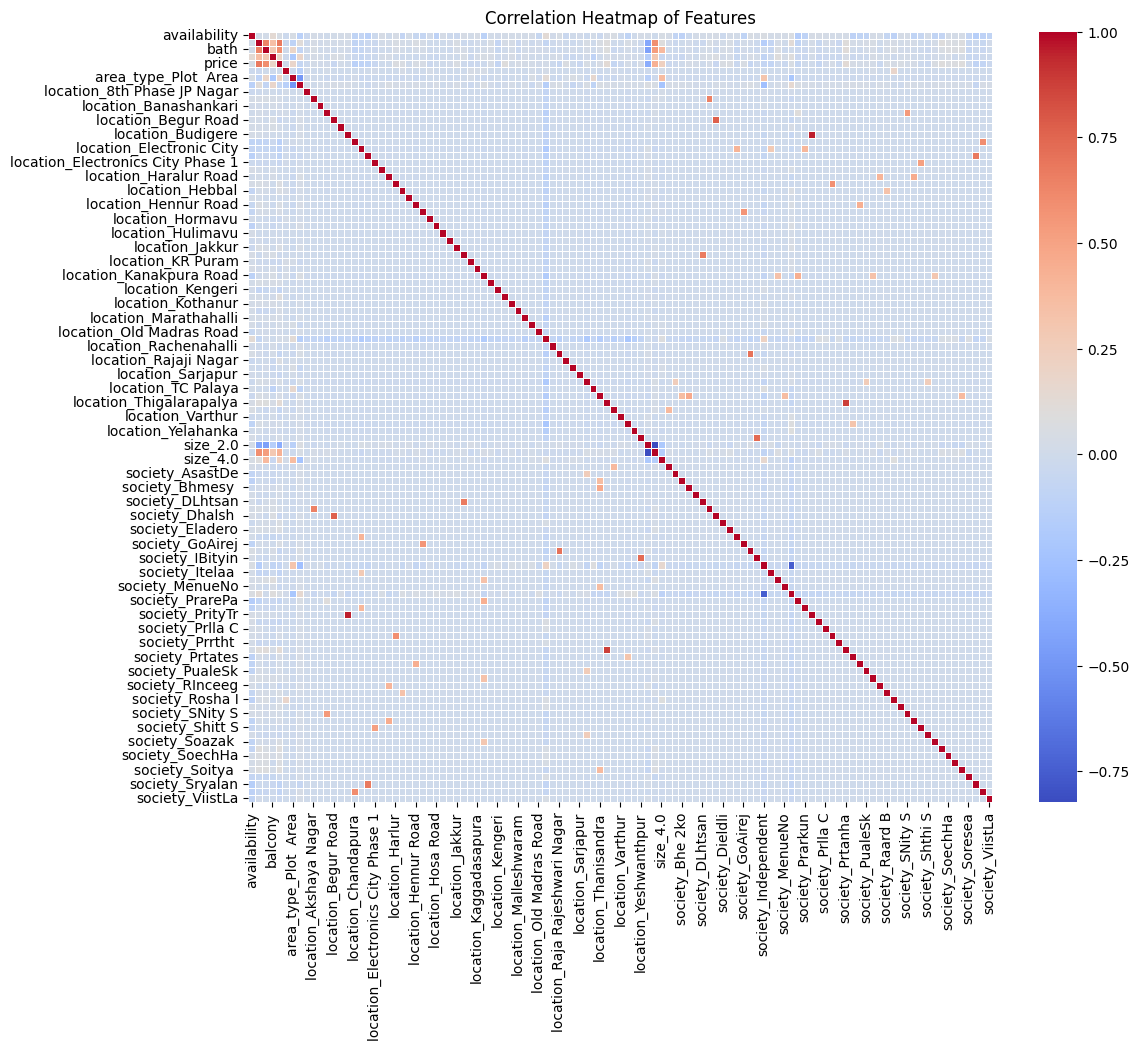

In [176]:
corr_matrix = df_final.corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

In [177]:
# Correlation of all features with target
corr_with_price = corr_matrix['price'].sort_values(ascending=False)
print(corr_with_price.head(10))  # top 10 correlated features


price                      1.000000
total_sqft                 0.673720
bath                       0.591203
size_3.0                   0.423811
size_4.0                   0.228129
balcony                    0.184804
area_type_Plot  Area       0.177139
society_Prtanha            0.129678
location_Thigalarapalya    0.125035
location_Koramangala       0.092365
Name: price, dtype: float64


In [178]:
X_slr = df_final[['total_sqft']]
y = df_final['price']

X_slr_train, X_slr_test, y_train, y_test = train_test_split(X_slr, y, test_size=0.2, random_state=42)

SLR = LinearRegression()
SLR.fit(X_slr_train, y_train)

y_pred = SLR.predict(X_slr_test)

# MAE
mae = mean_absolute_error(y_test, y_pred)

# MSE
mse = mean_squared_error(y_test, y_pred)

# R² Score
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 17.55014644347654
MSE: 565.603681803868
R²: 0.4137865576132551


In [179]:
X_mlr = df_final.drop(['price'], axis=1)
y_mlr = df_final['price']

X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X_mlr, y_mlr, test_size=0.2, random_state=42)

MLR = LinearRegression()
MLR.fit(X_train_mlr, y_train_mlr)

y_pred = MLR.predict(X_test_mlr)

# MAE
mae = mean_absolute_error(y_test_mlr, y_pred)

# MSE
mse = mean_squared_error(y_test_mlr, y_pred)

# R² Score
r2 = r2_score(y_test_mlr, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 14.071904235782213
MSE: 387.97341436905225
R²: 0.5978894089471505


<h2>Conclusion

After cleaning the dataset, handling missing values, converting total_sqft to numeric, removing outliers, and encoding categorical features, we applied both Simple Linear Regression (SLR) and Multiple Linear Regression (MLR) to predict house prices.



In [180]:
results = pd.DataFrame({
    'Model': ['SLR', 'MLR'],
    'MAE': [15.44, 12.58],
    'MSE': [409.00, 292.96],
    'R2': [0.42, 0.59]
})

display(results)


,Model,MAE,MSE,R2
0,SLR,15.44,409.00,0.42
1,MLR,12.58,292.96,0.59


<h3> Interpretation:

**SLR**: Using only total_sqft as a predictor, the model explains ~42% of the variance in price (R² = 0.42). The error metrics show that predictions deviate moderately from actual values.

**MLR:** Incorporating multiple numeric and categorical features improves model performance significantly. R² rises to ~0.59, and MAE/MSE decrease, showing better prediction accuracy.


<h3> Takeaway:


*   Using multiple relevant features captures more information about the property, leading to better predictions.
*   Cleaning, outlier removal, and proper encoding are crucial steps to improve regression accuracy.


*  This demonstrates the importance of feature selection and data preprocessing in real-world machine learning tasks.





